Load and Preprocess the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Lab_7.csv')

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Remove commas and convert 'Price' to numeric
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Sort data and get the last 60 days
last_60_days = data.sort_values(by='Date', ascending=False).head(60).sort_values(by='Date')


Plot Original Stock Prices for the Last 60 Days (Scatter Plot)

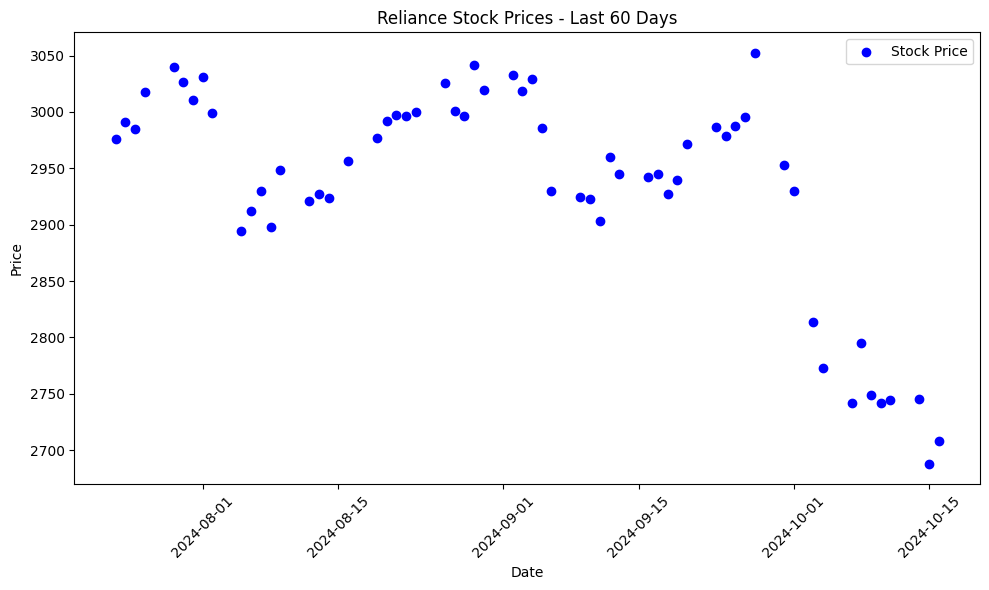

In [3]:
# Plot original data (scatter plot for stock prices)
plt.figure(figsize=(10, 6))
plt.scatter(last_60_days['Date'], last_60_days['Price'], color='blue', label='Stock Price')
plt.title('Reliance Stock Prices - Last 60 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Normalize Date Column for LOESS Smoothing

In [4]:

scaler = MinMaxScaler()
last_60_days['Date_scaled'] = scaler.fit_transform(last_60_days[['Date']])


Define a Function to Apply LOESS Smoothing and Plot for Different Spans

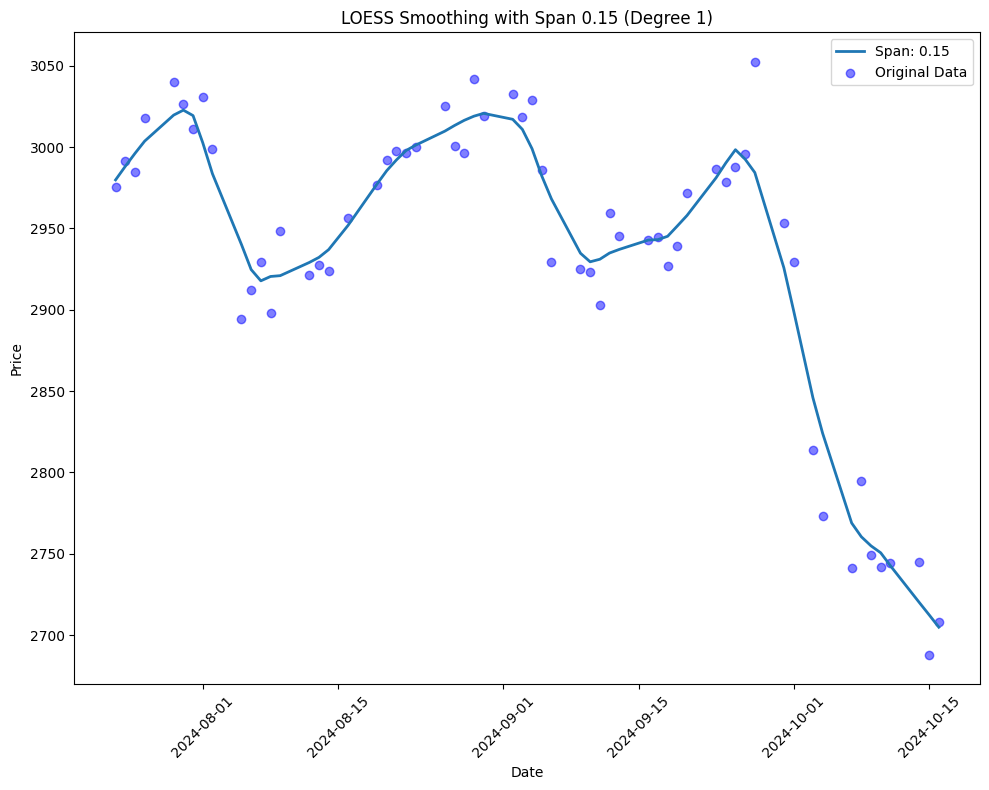

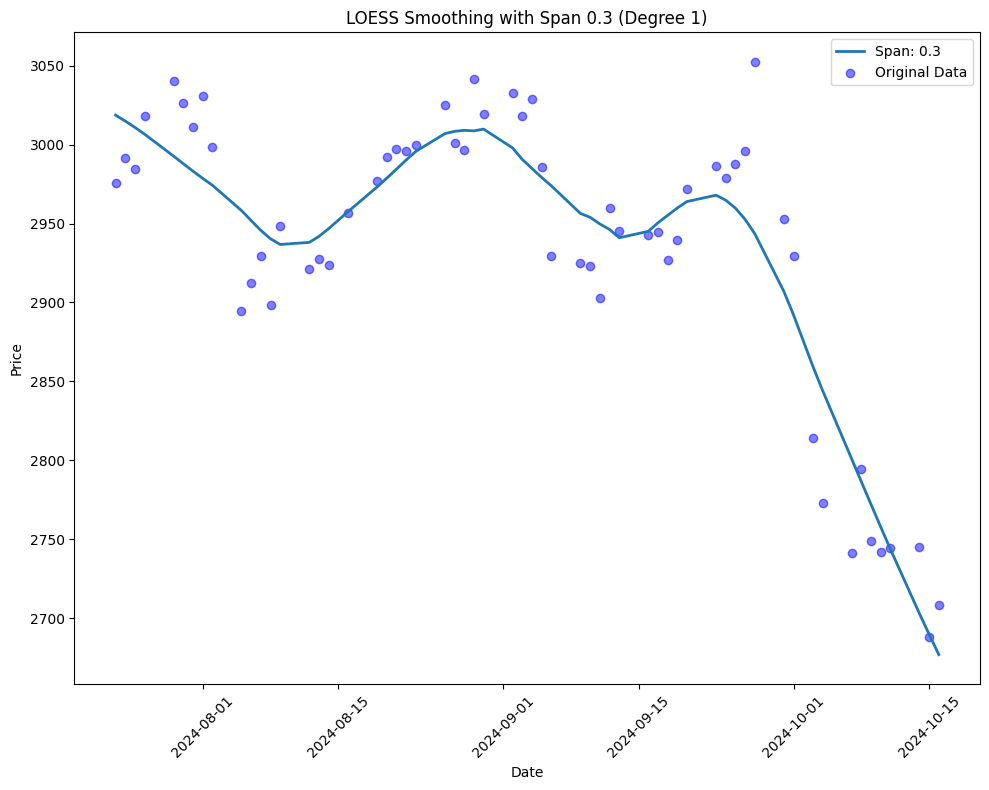

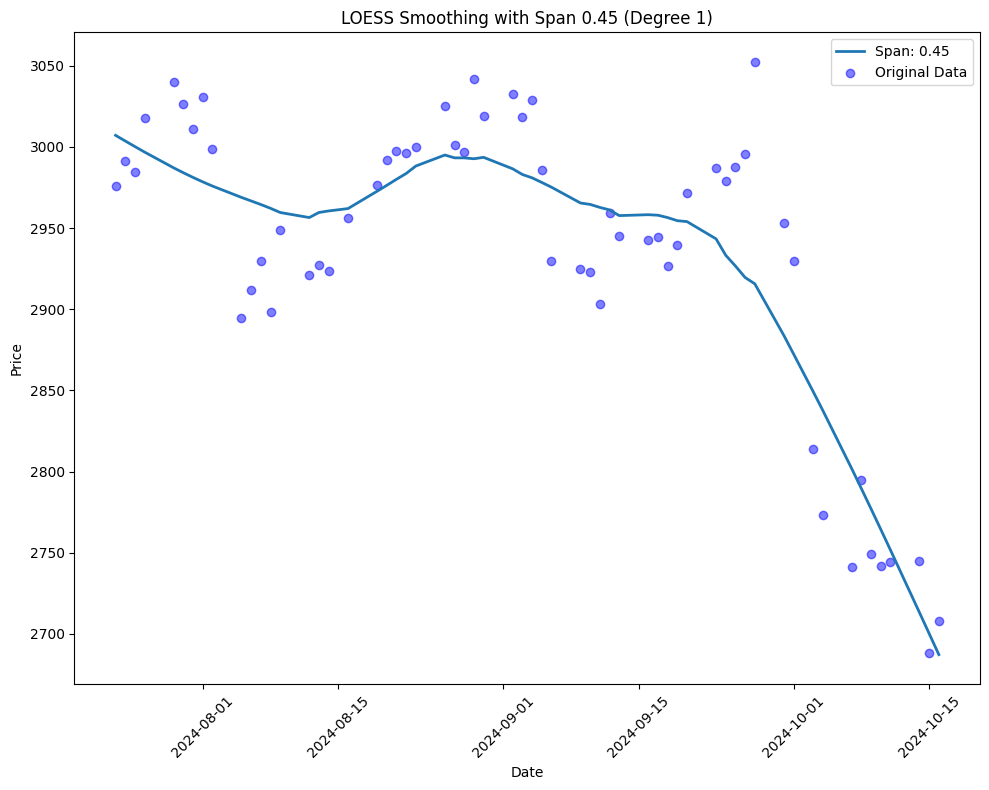

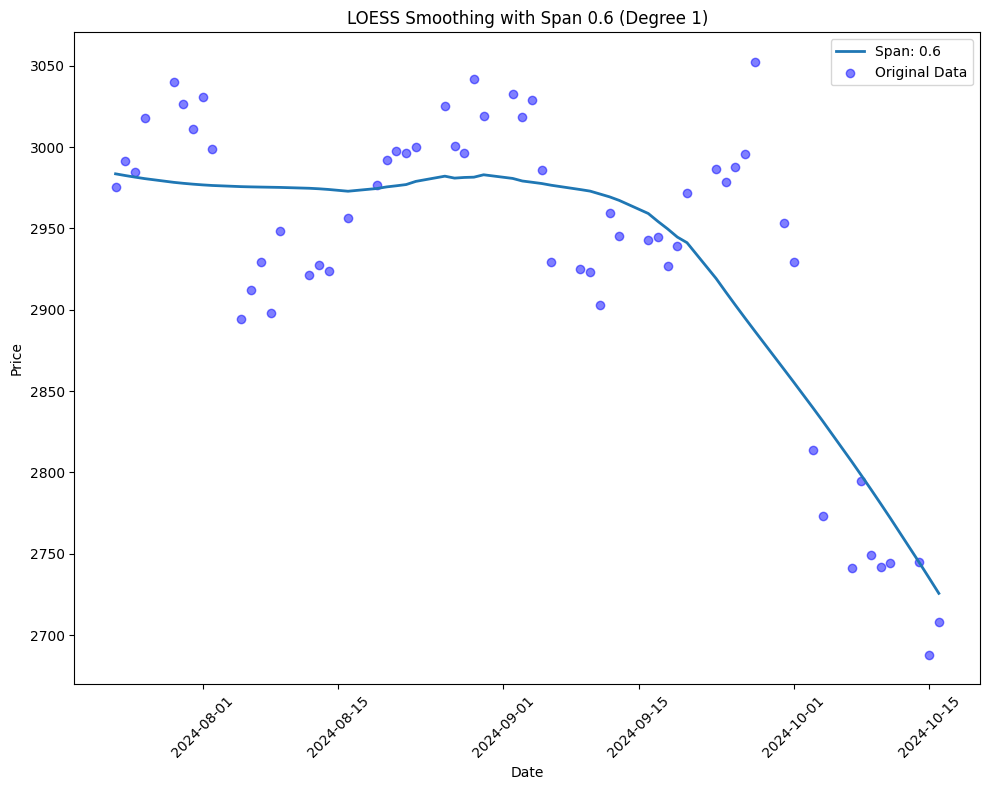

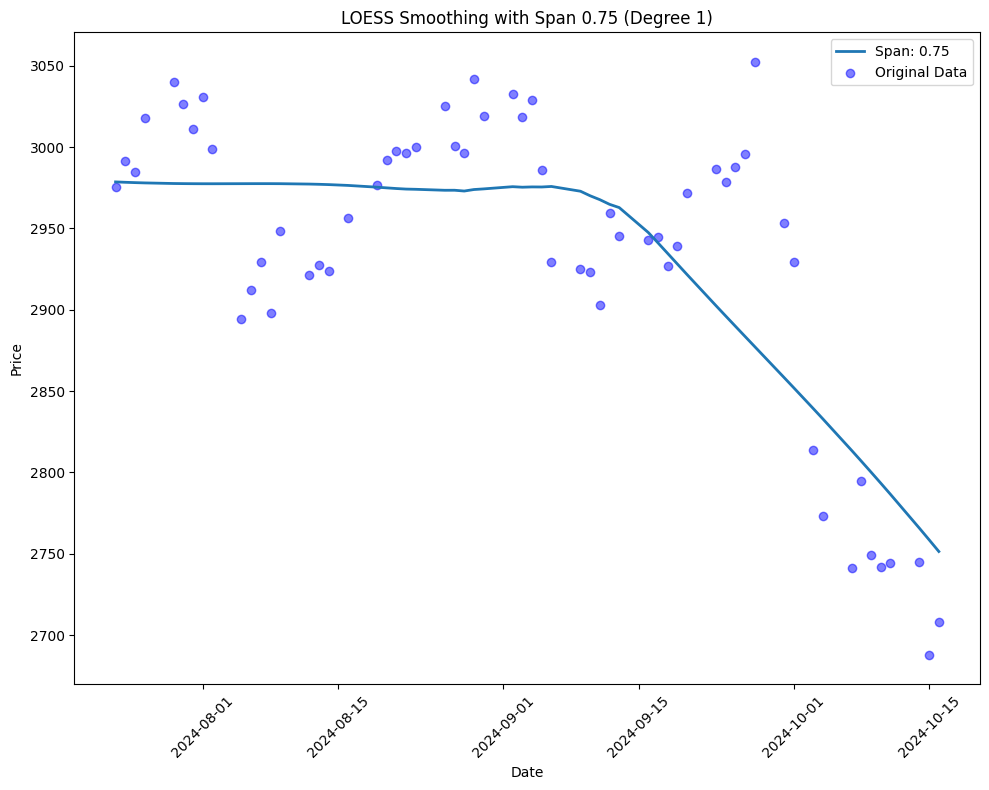

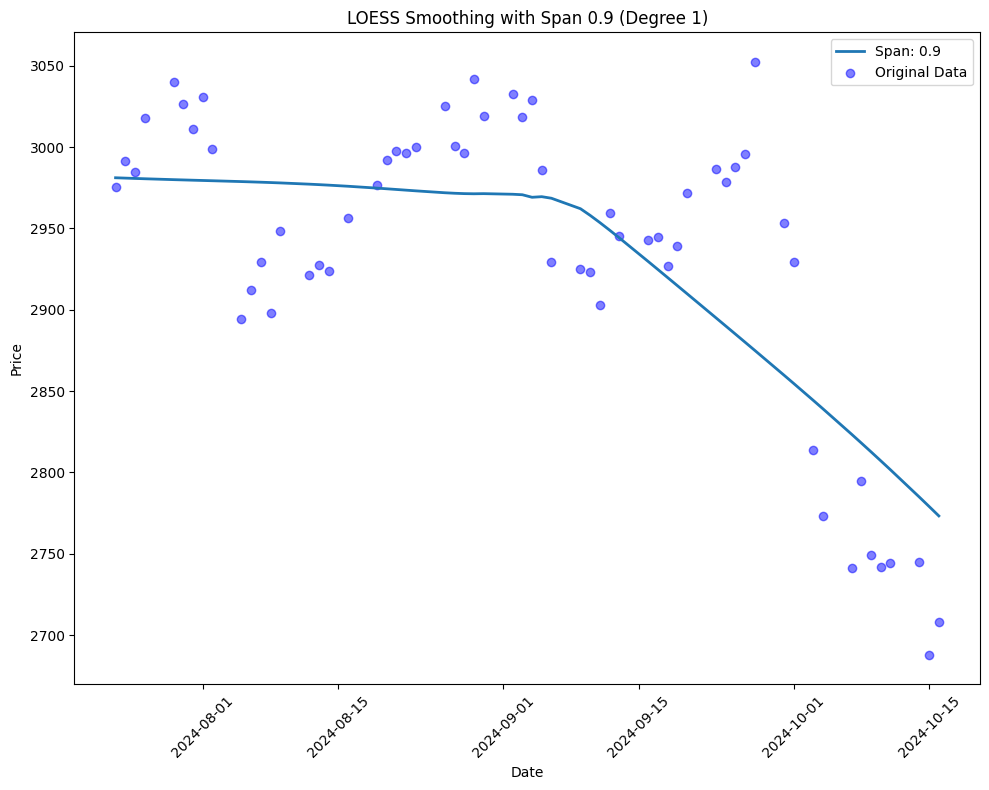

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming last_60_days is already defined and is a DataFrame
# Check the type of the 'Price' column
if last_60_days['Price'].dtype == 'object':
    # Clean 'Price' column by removing commas if it is a string type
    last_60_days['Price'] = last_60_days['Price'].replace(',', '', regex=True).astype(float)

# Define span values for LOESS smoothing
spans = [0.15, 0.30, 0.45, 0.60, 0.75, 0.90]

# Function to plot LOESS for different spans
def plot_loess(spans, degree):
    for span in spans:
        plt.figure(figsize=(10, 8))

        # Apply LOESS smoothing
        loess_smoothed = lowess(last_60_days['Price'], last_60_days['Date_scaled'], frac=span, it=0 if degree == 1 else 2)

        # Plot LOESS smoothed data
        plt.plot(last_60_days['Date'], loess_smoothed[:, 1], label=f'Span: {span}', linewidth=2)

        # Plot original data
        plt.scatter(last_60_days['Date'], last_60_days['Price'], color='blue', label='Original Data', alpha=0.5)

        # Add titles and labels
        plt.title(f'LOESS Smoothing with Span {span} (Degree {degree})')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()

        # Show plot
        plt.show()

# Apply LOESS for degree 1 (linear) and plot
plot_loess(spans, degree=1)


Determine the most optimal span value that balances between overfitting and underfitting

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.metrics import mean_squared_error

# Assuming last_60_days DataFrame is already defined and cleaned
# Define span values for LOESS smoothing
spans = [0.15, 0.30, 0.45, 0.60, 0.75, 0.90]

# Store MSE values for each span
mse_values = []

# Function to calculate LOESS and MSE for different spans
def calculate_loess_mse(spans):
    for span in spans:
        # Apply LOESS smoothing (degree 1)
        loess_smoothed = lowess(last_60_days['Price'], last_60_days['Date_scaled'], frac=span, it=0)

        # Calculate MSE
        mse = mean_squared_error(last_60_days['Price'], loess_smoothed[:, 1])
        mse_values.append(mse)

    return mse_values

# Calculate MSE for all spans
mse_values = calculate_loess_mse(spans)

# Print MSE results
for span, mse in zip(spans, mse_values):
    print(f'Span: {span}, MSE: {mse}')

# Step 2: Find the optimal span (the one with the lowest MSE)
optimal_span_index = np.argmin(mse_values)
optimal_span = spans[optimal_span_index]
optimal_mse = mse_values[optimal_span_index]

print(f'\nOptimal Span: {optimal_span}, Minimum MSE: {optimal_mse}')



Span: 0.15, MSE: 426.41167861099837
Span: 0.3, MSE: 1106.7697357126647
Span: 0.45, MSE: 1702.7312133434286
Span: 0.6, MSE: 2528.670908120429
Span: 0.75, MSE: 3035.4456020020966
Span: 0.9, MSE: 3349.639901775346

Optimal Span: 0.15, Minimum MSE: 426.41167861099837


For the optimal span, apply both linear (degree 1) and quadratic (degree 2) polynomial smoothing

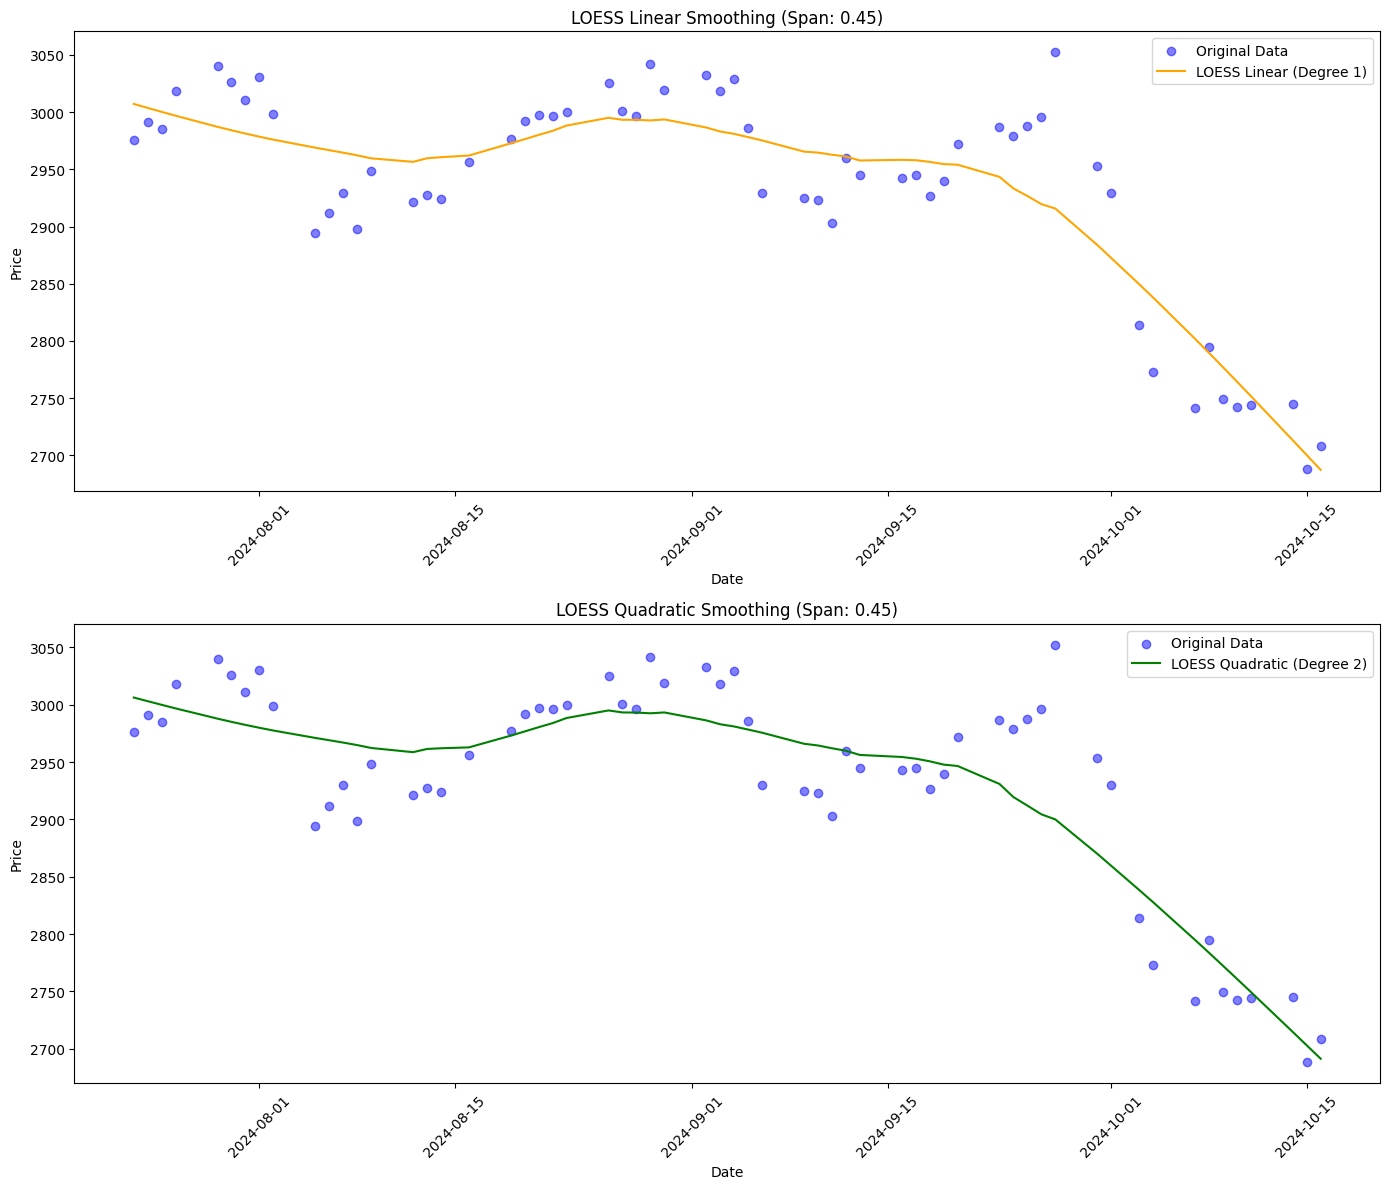

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming last_60_days DataFrame is already defined and cleaned
# Set the assumed optimal span
optimal_span = 0.45

# Apply LOESS smoothing for linear (degree 1) and quadratic (degree 2)
loess_smoothed_linear = lowess(last_60_days['Price'], last_60_days['Date_scaled'], frac=optimal_span, it=0)
loess_smoothed_quadratic = lowess(last_60_days['Price'], last_60_days['Date_scaled'], frac=optimal_span, it=2)

# Create two plots for comparison
plt.figure(figsize=(14, 12))

# Plot for Linear LOESS Smoothing
plt.subplot(2, 1, 1)
plt.scatter(last_60_days['Date'], last_60_days['Price'], color='blue', label='Original Data', alpha=0.5)
plt.plot(last_60_days['Date'], loess_smoothed_linear[:, 1], label='LOESS Linear (Degree 1)', color='orange')
plt.title('LOESS Linear Smoothing (Span: 0.45)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Plot for Quadratic LOESS Smoothing
plt.subplot(2, 1, 2)
plt.scatter(last_60_days['Date'], last_60_days['Price'], color='blue', label='Original Data', alpha=0.5)
plt.plot(last_60_days['Date'], loess_smoothed_quadratic[:, 1], label='LOESS Quadratic (Degree 2)', color='green')
plt.title('LOESS Quadratic Smoothing (Span: 0.45)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# In this analysis, the quadratic LOESS smoothing provides a significantly better fit for the stock price data
# compared to the linear approach.

# The ability of the quadratic model to capture local variations without overfitting makes it
# the more suitable choice for understanding the stock's movements.

# Therefore, quadratic LOESS with a span of 0.45 is recommended for more accurate data representation.
